In [15]:
%pip install scipy tqdm
%pip install matplotlib
%pip install "numpy<2"

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------- ----------------------------- 4.2/15.5 MB 36.1 MB/s eta 0:00:01
   ------------------------ --------------- 9.4/15.5 MB 23.5 MB/s eta 0:00:01
   ------------------------------- -------- 12.3/15.5 MB 20.3 MB/s eta 0:00:01
   ---------------------------------------  15.2/15.5 MB 18.4 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Rolling back uninstall of numpy
  Moving to c:\python312\lib\site-packages\numpy-2.0.2-cp312-cp312-win_amd64.whl
   from C:\Users\Toprak\AppData\Local\Temp\pip-uninstall-ahu32to_\numpy-2.0.2-cp312-cp312-win_amd64.whl
  Moving to c:\python312\lib\site-pack

ERROR: Could not install packages due to an OSError: [WinError 2] Sistem belirtilen dosyayı bulamıyor: 'c:\\Python312\\Scripts\\f2py.exe' -> 'c:\\Python312\\Scripts\\f2py.exe.deleteme'



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from tqdm import tqdm
%matplotlib inline

In [7]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # NODES
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = (np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)))
        self.who = (np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)))
        
        self.lr = learningrate
        # Burada lojistik sigmoid aktivasyon fonksiyonu kullanıyoz
        # 1/(1+exp(-x)) uygulanır
        self.activation_function = lambda x: sp.expit(x)
        pass
    
    def train(self,inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        # Update the weights
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs    

In [8]:
input_nodes = 784 # 28x28 pixels
hidden_nodes = 200
output_nodes = 10 # 0-9 digits

learning_rate = 0.1

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Dataset Okuma
Burada 100 tane data olan dataset dosyasını okuyoruz. Bir dosyayı okuduktan sonra `close()` kullanarak o dosyayı kapatmamız önemli.

Yoksa o dosya memory'de kalıyor ve hafızayı şişirerek problem oluşturabiliyor. Özellikle büyük boyutlu dosyalarda.

In [9]:
data_file = open("mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

Burada da `Matplotlib`'un içerisindeki `pyplot` kütüphanesini kullanarak csv dosyalarımızın içerisindeki verileri görsel olarak gösterebiliyoruz.

pyplot'u projemize `plt` adıyla import ettik o yüzden bu şekilde kullanıyoruz.

Yukarıda okuduğumuz csv dosyasının içeriğini `data_list` değişkenine kaydetmiştik. Aşağıda ise bu data_list'in içerisindeki verimizin piksel bilgilerini `all_values` adında bir listeye kaydettik virgüllerden ayırarak.

Ardından ise bunu bir numpy float array'ine çevirerek 28x28 boyutunda bir matrise dönüştürdük çünkü bizim görsellerimiz 28x28 pikselden oluşuyor.

En sonda ise `plt` içerisindeki `imshow` fonksiyonunu kullanarak bu değerleri bir görsel olarak oluşturduk. colormap değerimiz ise `Greys` olarak belirtildi çünkü görselimiz siyah-beyaz formatta oluşturulmuştu.

### Ek bilgi Neden colormap Greys seçildiği açısından.
- Görselimizin piksel bilgileri 0-255 arasında değerler alıyorlar. Bu değer siyah-beyazı temsil ediyor. Fakat biz color mapimizi (Renk haritası) Greys olarak belirtmezsek, varsayılan olarak görsel başka bir renk formatında yorumlanır ve bizim değerlerimiz başka siyah-beyaz arasındaki bir renktense başka renkleri temsil eder.

- Mesela `Greys` yerine `brg` seçilseydi 0 değeri blue yani maviyi, 255 değeri ise green yani yeşili temsil edecek orta değerler örneğin 124 red yani kırmızıyı temsil edecekti.
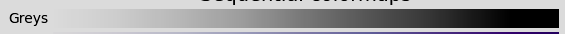
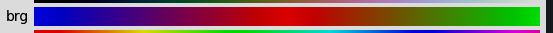

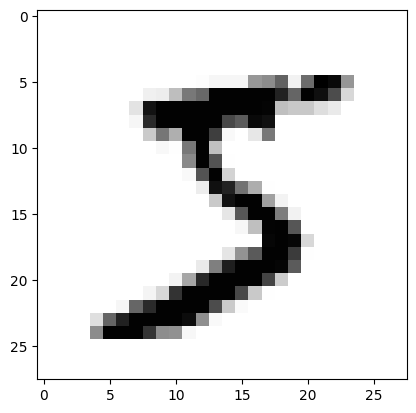

In [18]:
all_values = data_list[0].split(',')
image_array = np.asarray(all_values[1:], dtype=float).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

## Veri Ön İşleme

Bu aşamadan sonra verilerimize erişebiliyor ve görüntüleyebiliyoruz. Bir sonraki adımda ise verilerimizi neural network için daha kolay işlenebilir hale gelmesi açısından hazırlayacağız.

İlk adım olarak verilerimizi normalize edeceğiz, yani `0-255 (0: Beyaz, 255: Siyah)` olan verimizi, `0-1 (0: Beyaz, 1: Siyah)` olacak şekilde işleyeceğiz. Bu sayede Neural Network girdi verilerimizi daha kolay bir şekilde işleyebilecek.

In [20]:
scaled_input = np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99 + 0.01
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

## Neural Network'ün İşlevi

Şimdi verimizi hazırladık, geriye kalan soru `"Neural Network ne çıktı üretecek?"`

Elimizde sayıların `28x28` şeklinde oluşturulmuş matrisleri var ve bu matrislerden yola çıkarak yazılan sayının hangi sayı olduğunu tahmin etmek istiyoruz.
Yani problemimiz bir `classification` problemi, bu noktada elde edebileceğimiz sonuç `0-9` arasındaki rakamlardan birisi.

Bu noktada bizim `10 adet output layer`'a ihtiyacımız var ki, hangi node'un değeri daha yüksek ise Neural Network'ün tahmin ettiği değerin o değer olduğunu bilebileceğiz.

Yani sonuç olarak girdi olarak verdiğimiz sayı 5 ise bizim ideal çıktımız `[0,0,0,0,0,1,0,0,0,0]` şeklinde olmalı. (Tabi %100 doğru tahmin edildiği koşulda)

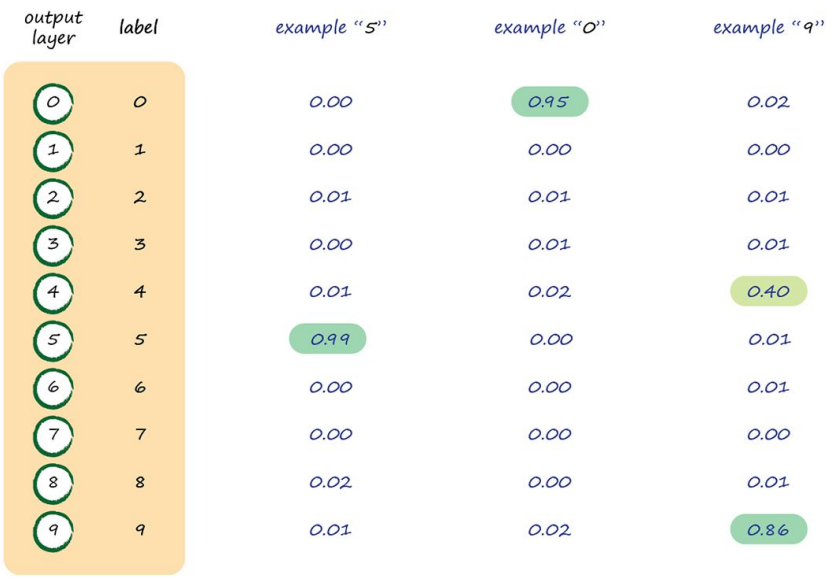


In [21]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

Yukarıda target nodelarımızı oluşturuyoruz

In [22]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

Burada modelimizi eğitiyoruz


In [23]:
# Traininin the neural network
training_dataset = open("mnist_dataset/mnist_train.csv", "r")
training_data_list = training_dataset.readlines()
training_dataset.close()

# Training

In [25]:
epochs = 5

for e in range(epochs):
    tqdm.write(f"Training epoch {e+1} of {epochs}")
    for record in tqdm(training_data_list, desc=f"Epoch {e+1}", leave=False):
        all_values = record.split(',')
        inputs = (np.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

Training epoch 1 of 5


Training epoch 2 of 5


Training epoch 3 of 5


Training epoch 4 of 5


Training epoch 5 of 5


Test edeceğiz


In [26]:
test_data_file = open("mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [27]:
all_values = test_data_list[0].split(',')

In [28]:
all_values[0]

'7'

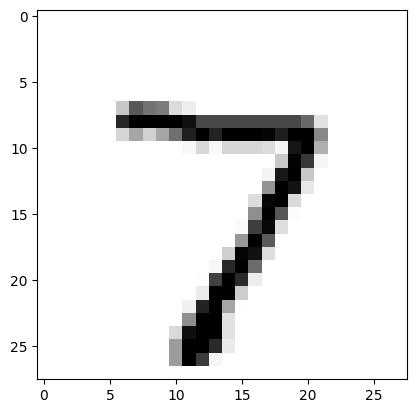

In [30]:
image_array = np.asarray(all_values[1:], dtype=float).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

Aşağıda ilk sonucumuzu alıyoruz

In [31]:
res = n.query((np.asarray(all_values[1:],dtype=float)) / 255.0 * 0.99 + 0.01)

print(res.argmax())
res

7


array([[0.00847274],
       [0.00689085],
       [0.00955767],
       [0.00198014],
       [0.00738708],
       [0.02377405],
       [0.00689259],
       [0.99485701],
       [0.00463548],
       [0.00222861]])

# Test the Model

Testing: 100%|██████████| 10000/10000 [00:01<00:00, 6966.98it/s]

Performance =  0.9732


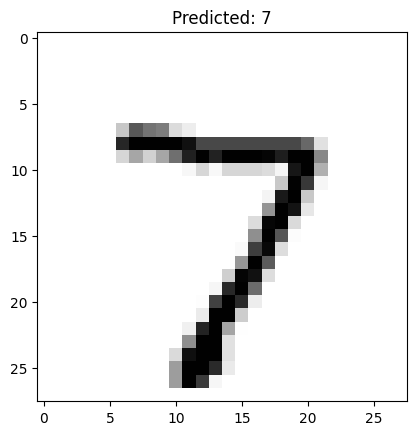

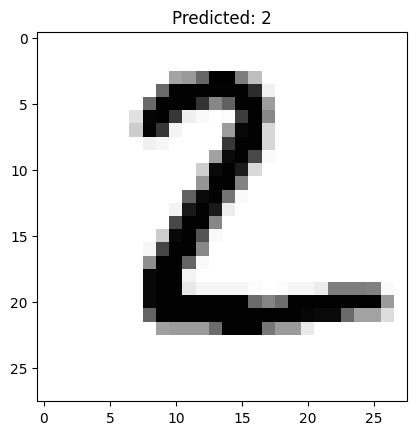

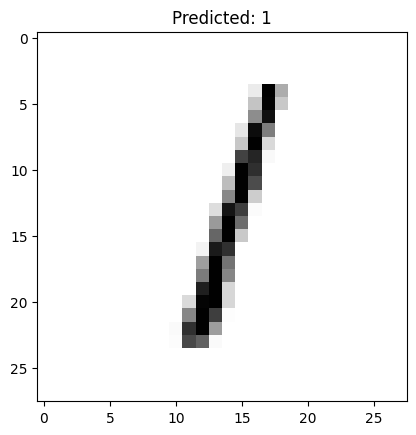

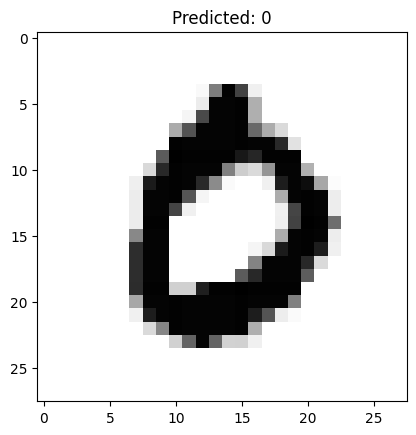

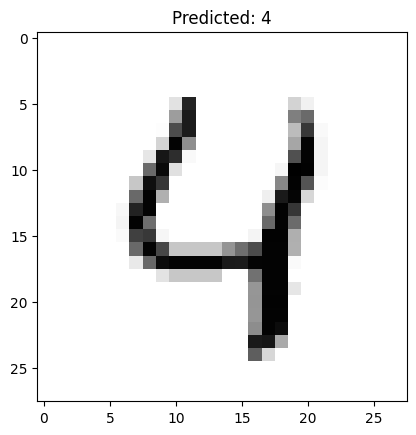

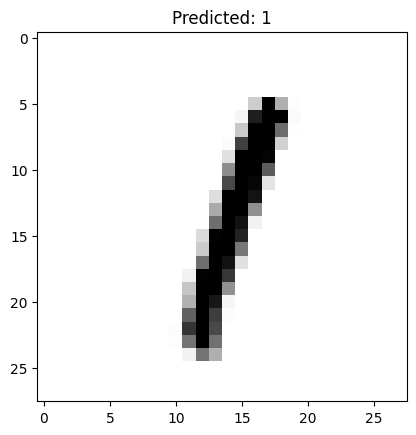

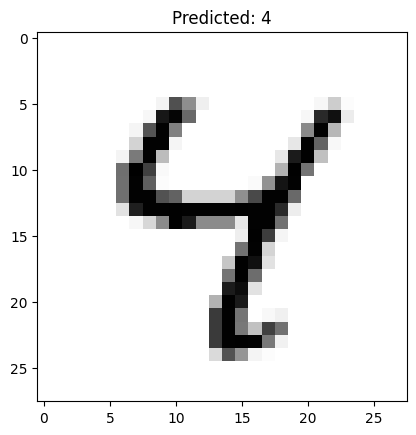

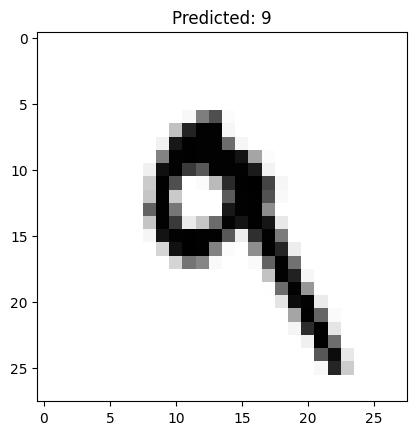

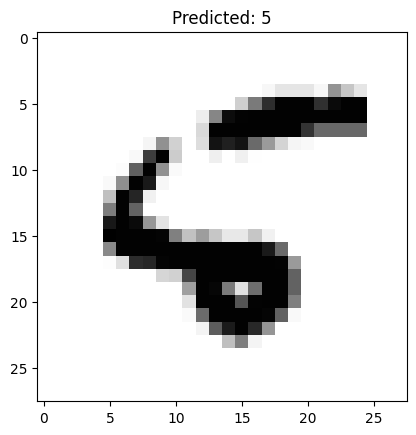

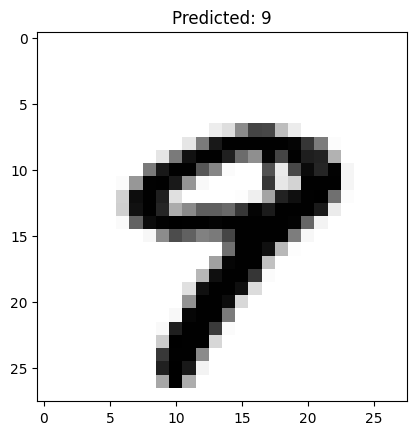

In [34]:
# Test the neural network
scorecard = []
for record in tqdm(test_data_list, desc="Testing"):
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asarray(all_values[1:],dtype=float) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)
# Visualize some test results
for i in range(10):
    all_values = test_data_list[i].split(',')
    image_array = np.asarray(all_values[1:],dtype=float).reshape((28,28))
    plt.imshow(image_array, cmap='Greys', interpolation='None')
    plt.title(f"Predicted: {n.query((np.asarray(all_values[1:],dtype=float) / 255.0 * 0.99) + 0.01).argmax()}")
    plt.show()